In [32]:
import matplotlib
matplotlib.use('Qt5Agg') #changed GTKAgg to TkAgg

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
import pandas as pd
%matplotlib inline

In [33]:
data1 = pd.read_csv("data1.csv")
mydata = data1.to_numpy()
mydata

array([[1.000e+00, 1.038e+01, 3.001e-01, 1.000e+00],
       [2.000e+00, 1.777e+01, 8.690e-02, 1.000e+00],
       [3.000e+00, 2.125e+01, 1.974e-01, 1.000e+00],
       ...,
       [5.670e+02, 2.808e+01, 9.251e-02, 1.000e+00],
       [5.680e+02, 2.933e+01, 3.514e-01, 1.000e+00],
       [5.690e+02, 2.454e+01, 0.000e+00, 0.000e+00]])

In [34]:
#new method

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Importing the dataset
dataset = pd.read_csv('data1.csv')
X = dataset.iloc[:, [1, 2]].values
y = dataset.iloc[:, 3].values


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [36]:
# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 21)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=21)

In [37]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [38]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


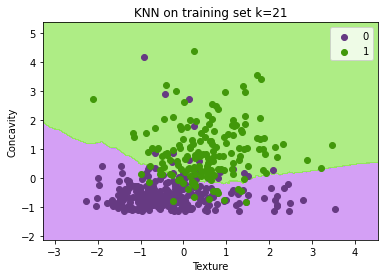

In [47]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('#c680f2', '#93e85c')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j,1],
                c = ListedColormap(('#663a82', '#41980a'))(i), label = j)
plt.title('KNN on training set k=21')
plt.xlabel('Texture')
plt.ylabel('Concavity')
plt.legend()
plt.show()

In [39]:
#method 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

mynames = ['n', 'texture', 'concavity', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv("data1.csv")

X = dataset.iloc[:, [1, 2]].values
y = dataset.iloc[:, 3].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [40]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[66  7]
 [ 8 33]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.90        73
           1       0.82      0.80      0.81        41

    accuracy                           0.87       114
   macro avg       0.86      0.85      0.86       114
weighted avg       0.87      0.87      0.87       114



In [41]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 180):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

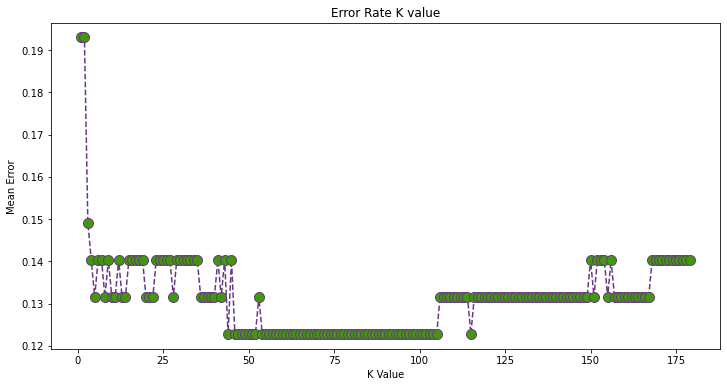

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 180), error, color='#663a82', linestyle='dashed', marker='o',
         markerfacecolor='#41980a', markersize=10)
plt.title('Error Rate K value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

In [43]:
#LDA and QDA

In [44]:
print(__doc__)

from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


# Colormap
#cmap = colors.LinearSegmentedColormap(
 #   'red_blue_classes',
  #  {'red': [(0, 1, 1), (1, 0.7, 0.7)],
   #  'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
    # 'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 0.77, 0.77), (1, 0.57, 0.57)],
     'green': [(0, 0.5, 0.5), (1, 0.91, 0.91)],
     'blue': [(0, 0.95, 0.95), (1, 0.36, 0.36)]})
#0.77, 0.5, 0.95
#0.57, 0.91, 0.36
plt.cm.register_cmap(cmap=cmap)

def dataset_fixed_cov():
    X = dataset.iloc[:, [1, 2]].values
    y = dataset.iloc[:, 3].values
    return X, y

def dataset_cov():
    X = dataset.iloc[:, [1, 2]].values
    y = dataset.iloc[:, 3].values
    return X, y

Automatically created module for IPython interactive environment


In [14]:
# Plot functions
def plot_data(lda, X, y, y_pred, fig_index):
    splot = plt.subplot(2, 2, fig_index)
    if fig_index == 1:
        plt.title('Linear Discriminant Analysis')
        plt.ylabel('')
    elif fig_index == 2:
        plt.title('Quadratic Discriminant Analysis')
    elif fig_index == 3:
        plt.ylabel('')

    tp = (y == y_pred)  # True Positive
    tp0, tp1 = tp[y == 0], tp[y == 1]
    X0, X1 = X[y == 0], X[y == 1]
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]

    # class 0: dots
    plt.scatter(X0_tp[:, 0], X0_tp[:, 1], marker='.', color='#663a82')
    plt.scatter(X0_fp[:, 0], X0_fp[:, 1], marker='x',
                s=20, color='#663a82')  # dark purple

    # class 1: dots
    plt.scatter(X1_tp[:, 0], X1_tp[:, 1], marker='.', color='#41980a')
    plt.scatter(X1_fp[:, 0], X1_fp[:, 1], marker='x',
                s=20, color='#41980a')  # dark green

    # class 0 and 1 : areas
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=0)
    plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

    # means
    #plt.plot(lda.means_[0][0], lda.means_[0][1],
    #         '*', color='yellow', markersize=15, markeredgecolor='grey')
    #plt.plot(lda.means_[1][0], lda.means_[1][1],
    #         '*', color='yellow', markersize=15, markeredgecolor='grey')

    return splot


def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    # filled Gaussian at 2 standard deviation
    ell = mpl.patches.Ellipse(mean, 2 * v[0] ** 0.5, 2 * v[1] ** 0.5,
                              180 + angle, facecolor=color,
                              edgecolor='black', linewidth=2)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.2)
    splot.add_artist(ell)
    splot.set_xticks(())
    splot.set_yticks(())


def plot_lda_cov(lda, splot):
    plot_ellipse(splot, lda.means_[0], lda.covariance_, 'red')
    plot_ellipse(splot, lda.means_[1], lda.covariance_, 'blue')


def plot_qda_cov(qda, splot):
    plot_ellipse(splot, qda.means_[0], qda.covariance_[0], 'red')
    plot_ellipse(splot, qda.means_[1], qda.covariance_[1], 'blue')

<ipython-input-14-44a919e08766>:36: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
<ipython-input-14-44a919e08766>:36: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',


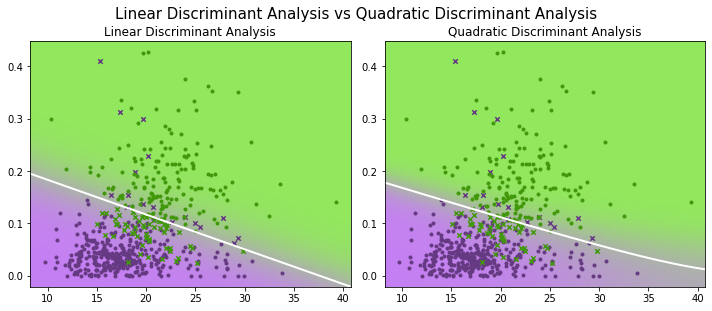

In [15]:
plt.figure(figsize=(10, 8), facecolor='white')
plt.suptitle('Linear Discriminant Analysis vs Quadratic Discriminant Analysis',
             y=0.98, fontsize=15)
for i, (X, y) in enumerate([dataset_fixed_cov()]):
    # Linear Discriminant Analysis
    lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
    y_pred = lda.fit(X, y).predict(X)
    splot = plot_data(lda, X, y, y_pred, fig_index=2 * i + 1)
    #plot_lda_cov(lda, splot)
    plt.axis('tight')

    # Quadratic Discriminant Analysis
    qda = QuadraticDiscriminantAnalysis(store_covariance=True)
    y_pred = qda.fit(X, y).predict(X)
    splot = plot_data(qda, X, y, y_pred, fig_index=2 * i + 2)
    #plot_qda_cov(qda, splot)
    plt.axis('tight')
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

In [45]:
#method 2
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

import warnings

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

#read csv file
bc_df = pd.read_csv("data1.csv")
bc_df.head(3)

dataset = pd.read_csv('data1.csv')
X = dataset.drop(['V2', 'Unnamed: 0'], axis=1)
y = dataset['V2']


#Create training and test datasets
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.20, random_state = 5)


In [46]:
# Create interaction terms (interaction of each regressor pair + polynomial)
#Interaction terms need to be created in both the test and train datasets
interaction2 = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False, order='C') #second degree
interaction3 = PolynomialFeatures(degree=3, include_bias=False, interaction_only=False, order='C') #third degree

#traning
X_train_2 = pd.DataFrame(interaction2.fit_transform(X_train), columns=interaction2.get_feature_names(input_features=X_train.columns))
X_train_3 = pd.DataFrame(interaction3.fit_transform(X_train), columns=interaction3.get_feature_names(input_features=X_train.columns))

X_train_2.head()

#test
X_test_2 = pd.DataFrame(interaction2.fit_transform(X_test), columns=interaction2.get_feature_names(input_features=X_train.columns))
X_test_3 = pd.DataFrame(interaction3.fit_transform(X_test), columns=interaction3.get_feature_names(input_features=X_train.columns))

X_test_3.head()

,V4,V9,V4^2,V4 V9,V9^2,V4^3,V4^2 V9,V4 V9^2,V9^3
0,25.27,0.16830,638.5729,4.252941,0.028325,16136.737183,107.471819,0.715770,0.004767
1,22.22,0.05370,493.7284,1.193214,0.002884,10970.645048,26.513215,0.064076,0.000155
2,10.89,0.08842,118.5921,0.962894,0.007818,1291.467969,10.485913,0.085139,0.000691
3,21.57,0.03344,465.2649,0.721301,0.001118,10035.763893,15.558458,0.024120,0.000037
4,24.21,0.01548,586.1241,0.374771,0.000240,14190.064461,9.073201,0.005801,0.000004


In [47]:
#############################
## Standardize all datasets 
#############################
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)

#Standardize the training sets: 1st, 2nd and 3rd order polynomials

X_train=pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_train_2=pd.DataFrame(scaler.fit_transform(X_train_2), columns=X_train_2.columns)
X_train_3=pd.DataFrame(scaler.fit_transform(X_train_3), columns=X_train_3.columns)

#Standardize the test sets: 1st, 2nd and 3rd order polynomials

X_test=pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)
X_test_2=pd.DataFrame(scaler.fit_transform(X_test_2), columns=X_test_2.columns)
X_test_3=pd.DataFrame(scaler.fit_transform(X_test_3), columns=X_test_3.columns)
X_train.head()

,V4,V9
0,-0.767966,-1.093146
1,-0.355792,-0.749131
2,0.649912,0.326786
3,0.268357,1.862319
4,1.040888,1.560953


In [48]:
#method 3
import pandas as pd
import numpy as np

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score

%matplotlib inline

dataset = pd.read_csv('data1.csv')
X = dataset.iloc[:, [1, 2]].values
y = dataset.iloc[:, 3].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [49]:
#LDA
lda = LinearDiscriminantAnalysis()
model = lda.fit(X_train, y_train)

print(model.priors_)

print(model.means_)

[0.63736264 0.36263736]
[[17.87031034  0.0469765 ]
 [21.40709091  0.15868048]]


In [50]:
print(model.coef_)

[[ 0.2324285  34.85718895]]


In [51]:
pred=model.predict(X_test)
print(np.unique(pred, return_counts=True))

(array([0, 1]), array([79, 35]))


In [52]:
print(confusion_matrix(pred, y_test))
print(classification_report(y_test, pred, digits=3))

[[66 13]
 [ 1 34]]
              precision    recall  f1-score   support

           0      0.835     0.985     0.904        67
           1      0.971     0.723     0.829        47

    accuracy                          0.877       114
   macro avg      0.903     0.854     0.867       114
weighted avg      0.892     0.877     0.873       114



In [53]:
#QDA
qda = QuadraticDiscriminantAnalysis()
model2 = qda.fit(X_train, y_train)
print(model2.priors_)
print(model2.means_)

[0.63736264 0.36263736]
[[17.87031034  0.0469765 ]
 [21.40709091  0.15868048]]


In [54]:
pred2=model2.predict(X_test)
print(np.unique(pred2, return_counts=True))
print(confusion_matrix(pred2, y_test))
print(classification_report(y_test, pred2, digits=3))

(array([0, 1]), array([75, 39]))
[[65 10]
 [ 2 37]]
              precision    recall  f1-score   support

           0      0.867     0.970     0.915        67
           1      0.949     0.787     0.860        47

    accuracy                          0.895       114
   macro avg      0.908     0.879     0.888       114
weighted avg      0.900     0.895     0.893       114



In [55]:
#Comparing Classifiers

Automatically created module for IPython interactive environment


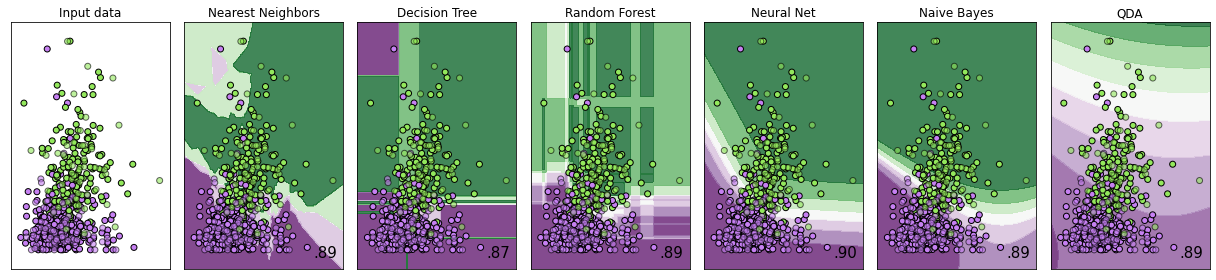

In [17]:
print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors","Decision Tree", "Random Forest", "Neural Net", "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
#    SVC(kernel="linear", C=0.025),
#    SVC(gamma=2, C=1),
#    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
#    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

#X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
#                           random_state=1, n_clusters_per_class=1)
X = dataset.iloc[:, [1, 2]].values
y = dataset.iloc[:, 3].values

#rng = np.random.RandomState(2)
#X += 2 * rng.uniform(size=X.shape)
#linearly_separable = (X, y)

datasets = [dataset]
#[make_moons(noise=0.3, random_state=0),
#            make_circles(noise=0.2, factor=0.5, random_state=1),
#            linearly_separable
#            ]

figure = plt.figure(figsize=(17, 4))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
#    X, y = ds

    X = dataset.iloc[:, [1, 2]].values
    y = dataset.iloc[:, 3].values
    X = StandardScaler().fit_transform(X)
#    X_train, X_test, y_train, y_test = \
#        train_test_split(X, y, test_size=.4, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.PRGn
    cm_bright = ListedColormap(['#C680f2', '#93e85c'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

In [56]:
#errors

In [57]:
#LDA
lda = KNeighborsClassifier(n_neighbors=49)
model = lda.fit(X_train, y_train)

#print(model.priors_)
#print(model.means_)
#print(model.coef_)
pred=model.predict(X_test)
print(np.unique(pred, return_counts=True))
print(confusion_matrix(pred, y_test))
print(classification_report(y_test, pred, digits=3))

(array([0, 1]), array([61, 53]))
[[48 13]
 [19 34]]
              precision    recall  f1-score   support

           0      0.787     0.716     0.750        67
           1      0.642     0.723     0.680        47

    accuracy                          0.719       114
   macro avg      0.714     0.720     0.715       114
weighted avg      0.727     0.719     0.721       114



In [77]:
#knn test and train errors
print(__doc__)

# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause

import numpy as np
from sklearn import linear_model

X = dataset.iloc[:, [1, 2]].values
y = dataset.iloc[:, 3].values


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# #############################################################################
# Compute train and test errors
alphas = np.logspace(-5, 1, 60)
knn = KNeighborsClassifier(n_neighbors=5)
train_errors = list()
test_errors = list()
for alpha in alphas:
#    enet.set_params(alpha=alpha)
    knn.fit(X_train, y_train)
    train_errors.append(knn.score(X_train, y_train))
    test_errors.append(knn.score(X_test, y_test))

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
#print("Optimal regularization parameter : %s" % alpha_optim)
from statistics import mean
print(mean(train_errors))
print(mean(test_errors))

Automatically created module for IPython interactive environment
0.8461538461538461
0.7368421052631579


In [72]:
#LDA test and train errors
print(__doc__)

# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause

import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import linear_model

X = dataset.iloc[:, [1, 2]].values
y = dataset.iloc[:, 3].values


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# #############################################################################
# Compute train and test errors
alphas = np.logspace(-5, 1, 60)
lda = LinearDiscriminantAnalysis()
train_errors = list()
test_errors = list()
for alpha in alphas:
#    enet.set_params(alpha=alpha)
    lda.fit(X_train, y_train)
    train_errors.append(lda.score(X_train, y_train))
    test_errors.append(lda.score(X_test, y_test))

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
#print("Optimal regularization parameter : %s" % alpha_optim)
from statistics import mean
print(mean(train_errors))
print(mean(test_errors))

Automatically created module for IPython interactive environment
0.865934065934066
0.8771929824561403


In [73]:
#QDA
print(__doc__)

# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause

import numpy as np
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import linear_model

X = dataset.iloc[:, [1, 2]].values
y = dataset.iloc[:, 3].values


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# #############################################################################
# Compute train and test errors
alphas = np.logspace(-5, 1, 60)
qda = QuadraticDiscriminantAnalysis()
train_errors = list()
test_errors = list()
for alpha in alphas:
#    enet.set_params(alpha=alpha)
    qda.fit(X_train, y_train)
    train_errors.append(qda.score(X_train, y_train))
    test_errors.append(qda.score(X_test, y_test))

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
#print("Optimal regularization parameter : %s" % alpha_optim)
from statistics import mean
print(mean(train_errors))
print(mean(test_errors))

Automatically created module for IPython interactive environment
0.8791208791208791
0.8947368421052632


In [58]:
#Feature selection

In [59]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
 
from imblearn.over_sampling import SMOTE
#data_final_vars=data_final.columns.values.tolist()
#y=['y']
#X=[i for i in data_final_vars if i not in y]
from imblearn.over_sampling import SMOTE
X = dataset.iloc[:, [1, 2]].values
y = dataset.iloc[:, 3].values
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
knn = KNeighborsClassifier(n_neighbors=21)
rfe = RFE(knn, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

In [63]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis